In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import imread, imsave
import cPickle as pickle
import yaml
import collections
from tqdm import tqdm
import time
from scipy.ndimage.interpolation import zoom

# Making the icons

In [3]:
import pandas as pd

In [4]:
savedir = './mapapp/assets/charts/'
loadpath = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/massive_dataset/per_site_summaries.csv'

df = pd.read_csv(loadpath)

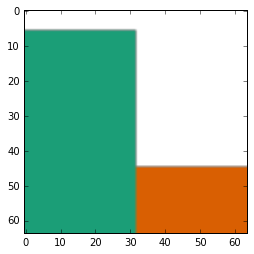

In [18]:
bio_col = np.array([27, 158, 119, 255]) / 255.0
anthro_col = np.array([217, 95, 2, 255]) / 255.0

for idx, row in df.iterrows():
#     print row

    im = np.ones((64, 64, 4))
    im[:, :, -1] = 0

    h_anthro = int(row['anthrop'] * 60)
    h_bio = int(row['biotic'] * 60)
    
    im[h_bio:, :32, :] = bio_col
    im[h_anthro:, 32:, :] = anthro_col
    
    imsave(savedir + '%s.png' % row['Unnamed: 0'], im)

plt.imshow(im)

# Making csv file

In [10]:
final = []
for idx, row in df.iterrows():
#     print row['Unnamed: 0']
    lat = 51.277 + np.random.rand() * 0.35
    lon = -0.4593 + np.random.rand() * 0.8
    final.append([row['Unnamed: 0'], lat, lon])
    
df = pd.DataFrame(final)
df.to_csv('./mapapp/assets/sites_info.csv', header=False, index=False)